In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [35]:
# Core Libraries
import pandas as pd
import numpy as np
from scipy import stats
import random
import warnings

# Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import squarify
%matplotlib inline

# Machine Learning Libraries

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression


# Ignore warnings
warnings.filterwarnings("ignore")


# **LOADING THE DATASET**

In [36]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [38]:
print(df_train.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [39]:
def consolidate_sleep_duration(duration):
    if duration in ['Less than 5 hours', '2-3 hours', '1-3 hours', 'No']:
        return 'Less than 5 hours'
    elif duration in ['3-4 hours', '4-5 hours']:
        return '3-4 hours'
    elif duration in ['5-6 hours', '4-6 hours', '6-7 hours', '1-6 hours']:
        return '5-6 hours'
    elif duration in ['7-8 hours', '6-8 hours', '8-9 hours']:
        return '7-8 hours'
    elif duration in ['More than 8 hours', '9-11 hours', '10-11 hours', '49 hours']:
        return 'More than 8 hours'
    else:
        return 'Other'


df_train['Sleep Duration'] = df_train['Sleep Duration'].apply(consolidate_sleep_duration)

In [40]:
df_train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38794
7-8 hours            36975
More than 8 hours    32731
5-6 hours            32159
Other                   22
3-4 hours               19
Name: count, dtype: int64

In [41]:
df_train['City'].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

# **EXPLORATORY DATA ANALYSIS**

In [42]:
data=df_train.copy()

In [43]:
data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [44]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [45]:
data['Financial Stress'].value_counts()

Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
Name: count, dtype: int64

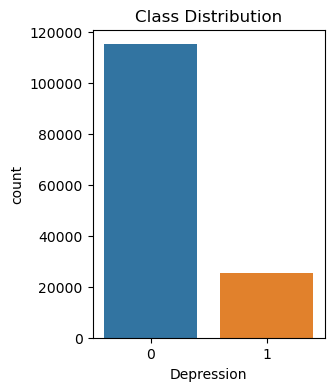

In [46]:
plt.figure(figsize=(3,4))
sns.countplot(data=data, x='Depression')
plt.title("Class Distribution")

plt.show()

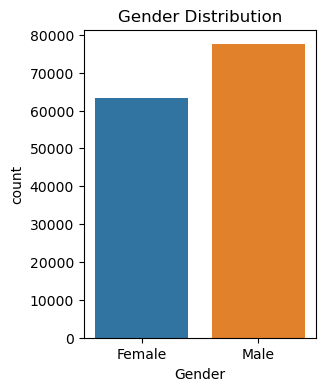

In [47]:
plt.figure(figsize=(3,4))
sns.countplot(data=data, x='Gender')
plt.title("Gender Distribution")

plt.show()

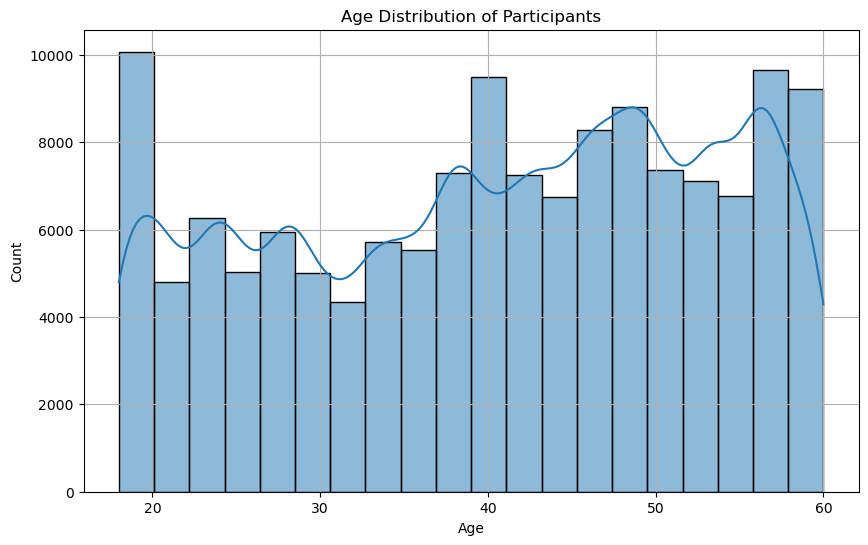

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.grid()
plt.show()

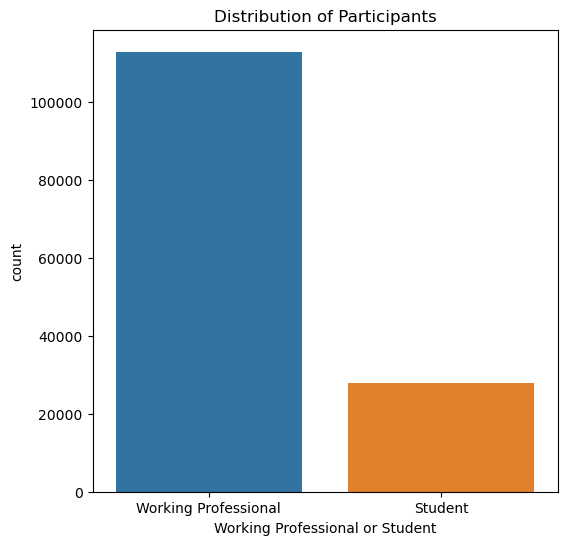

In [49]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data,x=data['Working Professional or Student'])
plt.title('Distribution of Participants')
plt.xlabel('Working Professional or Student')

plt.show()

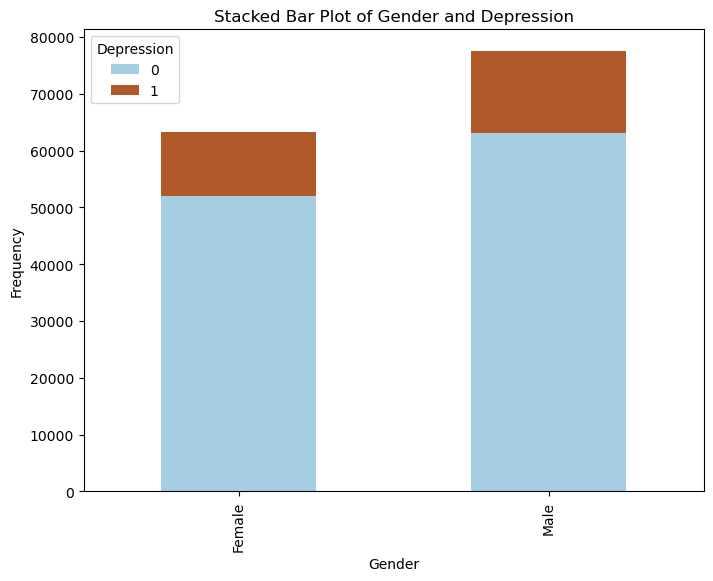

In [50]:
cvv=pd.crosstab(data['Gender'], data["Depression"])
cvv.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Paired')
plt.title(f"Stacked Bar Plot of Gender and Depression")
plt.xlabel('Gender')
plt.ylabel("Frequency")
plt.show()

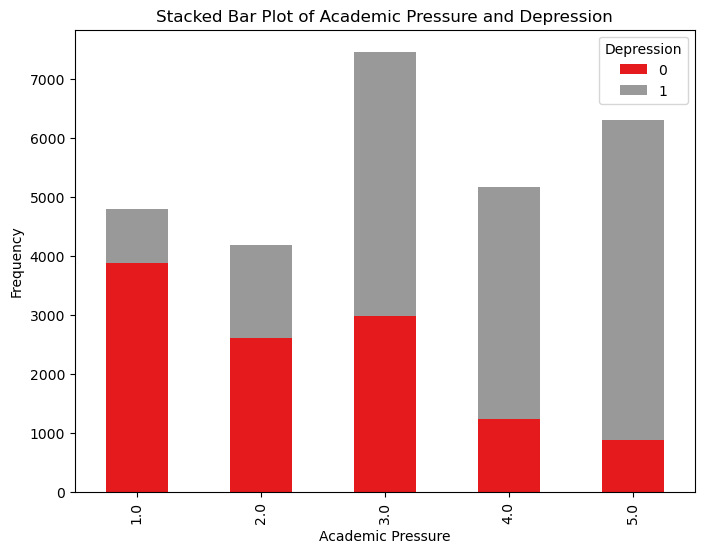

In [51]:
pd.crosstab(data['Academic Pressure'], data["Depression"]).plot(kind='bar', stacked=True, figsize=(8, 6),colormap='Set1')
plt.title(f"Stacked Bar Plot of Academic Pressure and Depression")
plt.xlabel('Academic Pressure')
plt.ylabel("Frequency")
plt.show()

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

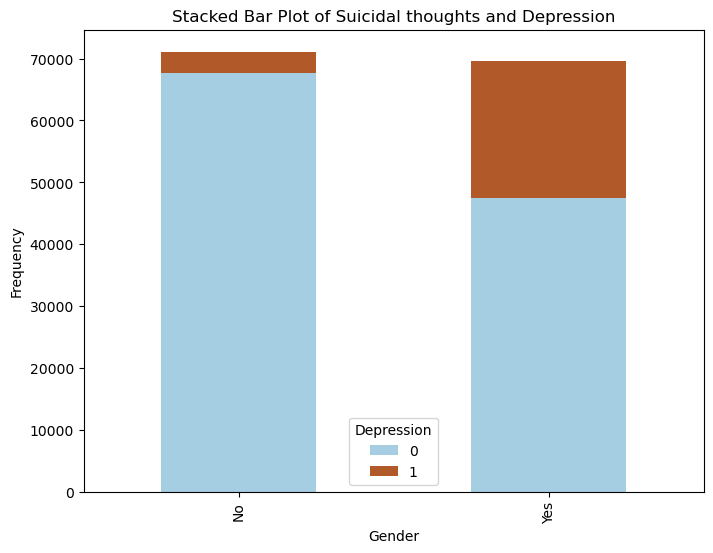

In [53]:
cvv=pd.crosstab(data['Have you ever had suicidal thoughts ?'], data["Depression"])
cvv.plot(kind='bar', stacked=True, figsize=(8, 6),colormap='Paired')
plt.title(f"Stacked Bar Plot of Suicidal thoughts and Depression")
plt.xlabel('Gender')
plt.ylabel("Frequency")
plt.show()

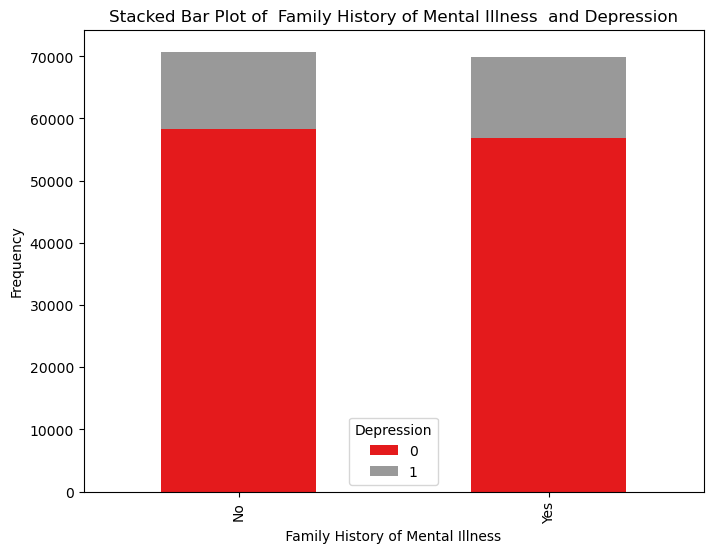

In [54]:
pd.crosstab(data['Family History of Mental Illness'], data["Depression"]).plot(kind='bar', stacked=True, figsize=(8, 6),colormap='Set1')
plt.title(f"Stacked Bar Plot of  Family History of Mental Illness  and Depression")
plt.xlabel(' Family History of Mental Illness ')
plt.ylabel("Frequency")
plt.show()

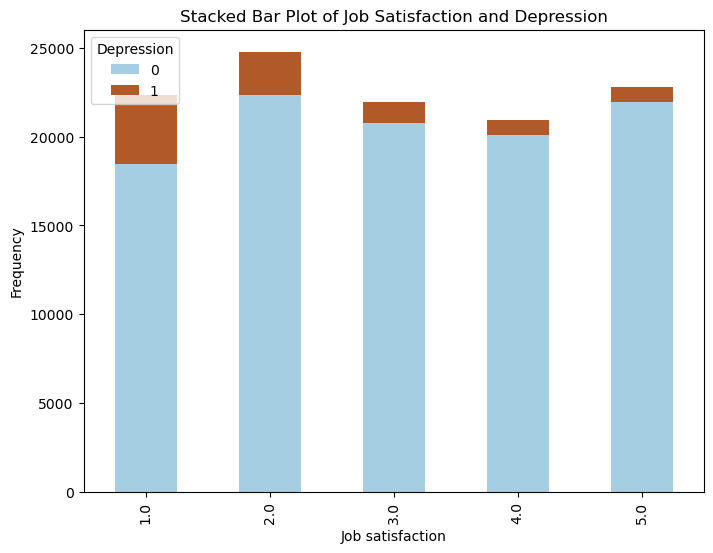

In [55]:
 pd.crosstab(data['Job Satisfaction'], data["Depression"]).plot(kind='bar', stacked=True, figsize=(8, 6),colormap='Paired')
plt.title(f"Stacked Bar Plot of Job Satisfaction and Depression")
plt.xlabel('Job satisfaction')
plt.ylabel("Frequency")
plt.show()

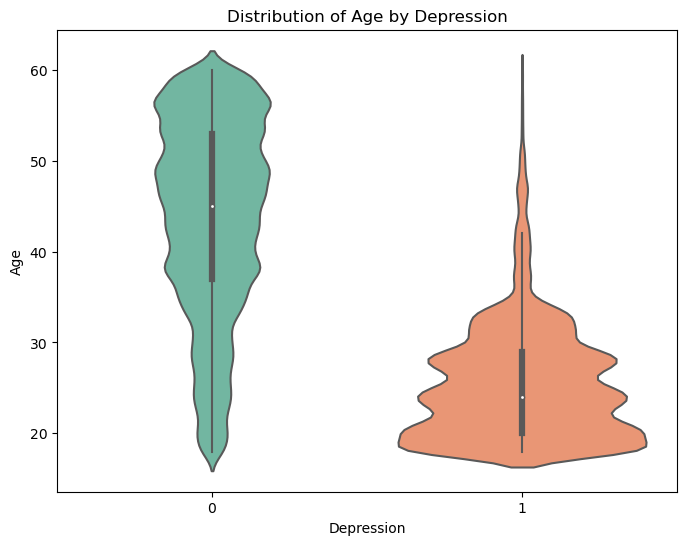

In [56]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Depression', y='Age', palette= 'Set2')
plt.title(f'Distribution of Age by Depression')
plt.show()

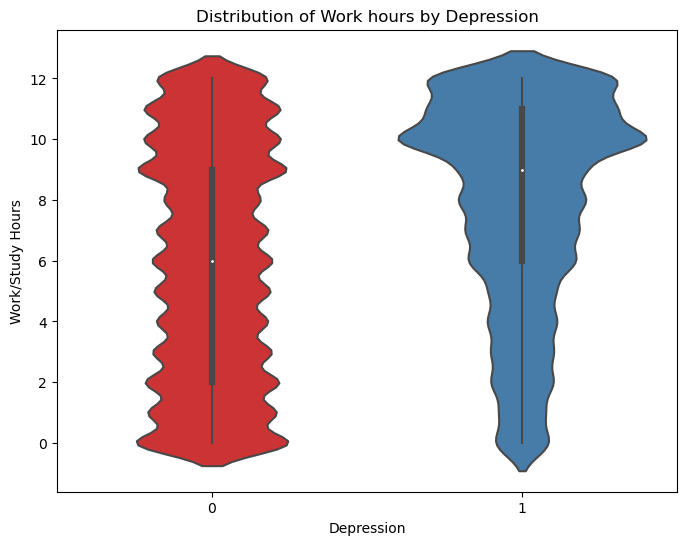

In [57]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Depression', y='Work/Study Hours',palette='Set1')
plt.title(f'Distribution of Work hours by Depression')
plt.show()

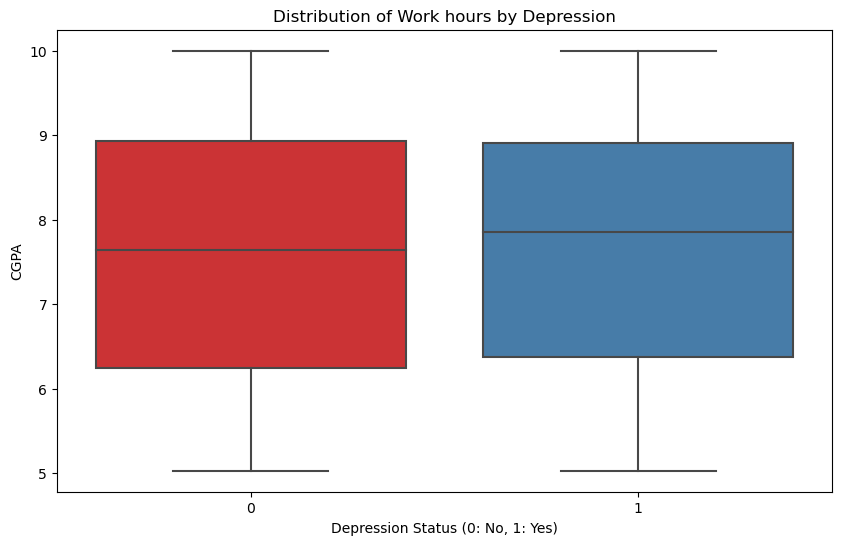

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression', y='CGPA', data=data, palette='Set1')
plt.title('Distribution of Work hours by Depression')
plt.xlabel('Depression Status (0: No, 1: Yes)')
plt.ylabel('CGPA')
plt.show()

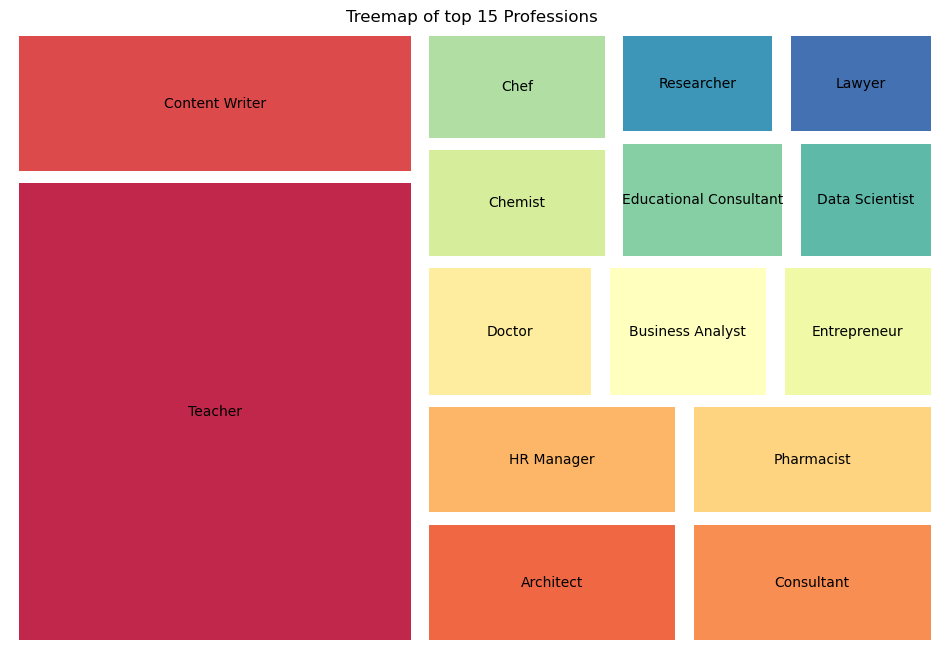

In [59]:
prof = data['Profession'].value_counts()
prof1 = prof.values[:15]
labels= prof.index[:15]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=prof1, label=labels,color=sns.color_palette("Spectral",
                                     len(prof1)), pad=True)
plt.title("Treemap of top 15 Professions ")
plt.axis("off")
plt.show()

In [60]:
# Group by Profession and Sleep Duration, then count Depression cases
pro_dep=data.groupby(['Profession'])['Depression'].sum()
pro_dep

Profession
Academic                  0
Accountant               86
Analyst                   0
Architect               433
B.Com                     0
                       ... 
Unveil                    0
Visakhapatnam             0
Working Professional      0
Yogesh                    2
Yuvraj                    0
Name: Depression, Length: 64, dtype: int64

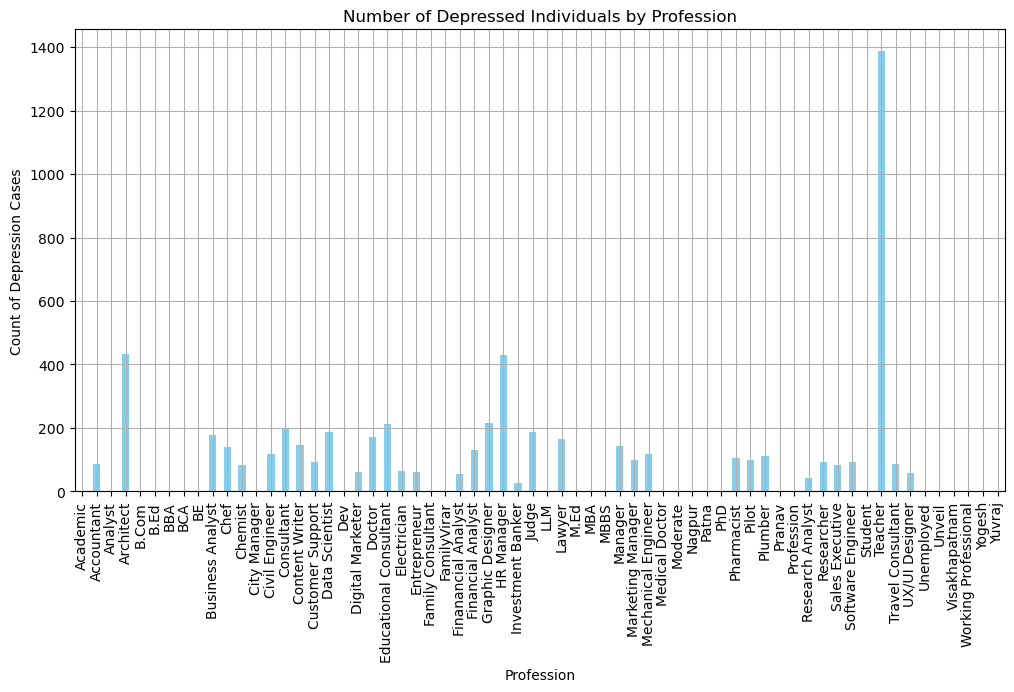

In [61]:
plt.figure(figsize=(12, 6))
pro_dep.plot(kind='bar', color='skyblue')
plt.title('Number of Depressed Individuals by Profession')
plt.xlabel('Profession')
plt.ylabel('Count of Depression Cases')

plt.grid()
plt.show()

In [62]:
sleep_dep=data.groupby(['Sleep Duration'])['Depression'].sum()
sleep_dep

Sleep Duration
3-4 hours               2
5-6 hours            5325
7-8 hours            6594
Less than 5 hours    9102
More than 8 hours    4541
Other                   3
Name: Depression, dtype: int64

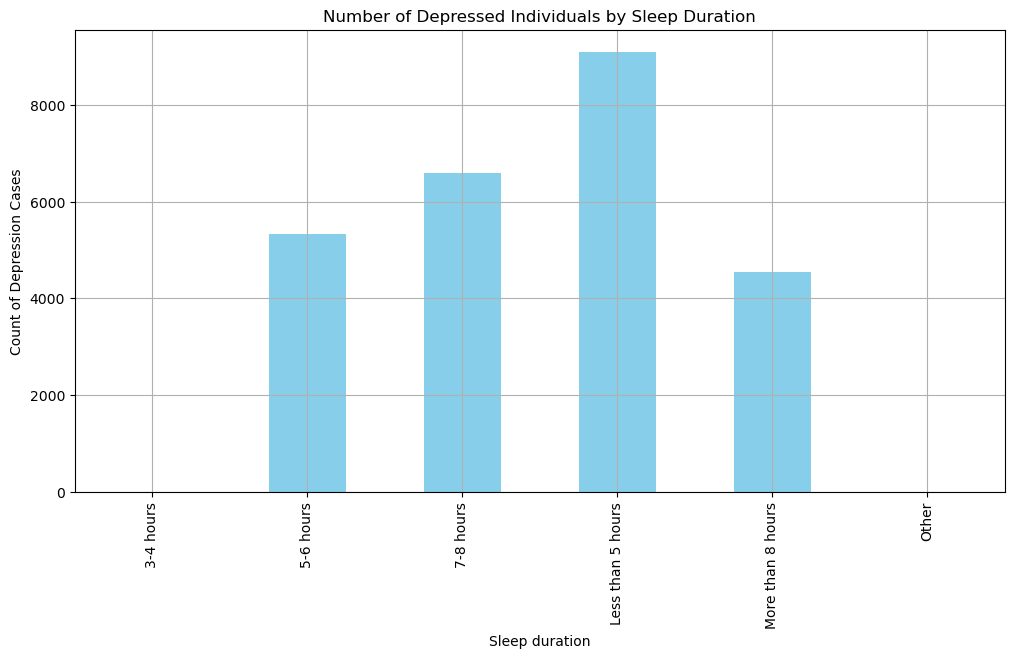

In [63]:
plt.figure(figsize=(12, 6))
sleep_dep.plot(kind='bar', color='skyblue')
plt.title('Number of Depressed Individuals by Sleep Duration')
plt.xlabel('Sleep duration')
plt.ylabel('Count of Depression Cases')

plt.grid()
plt.show()

In [64]:
data=data.drop('id', axis=1)

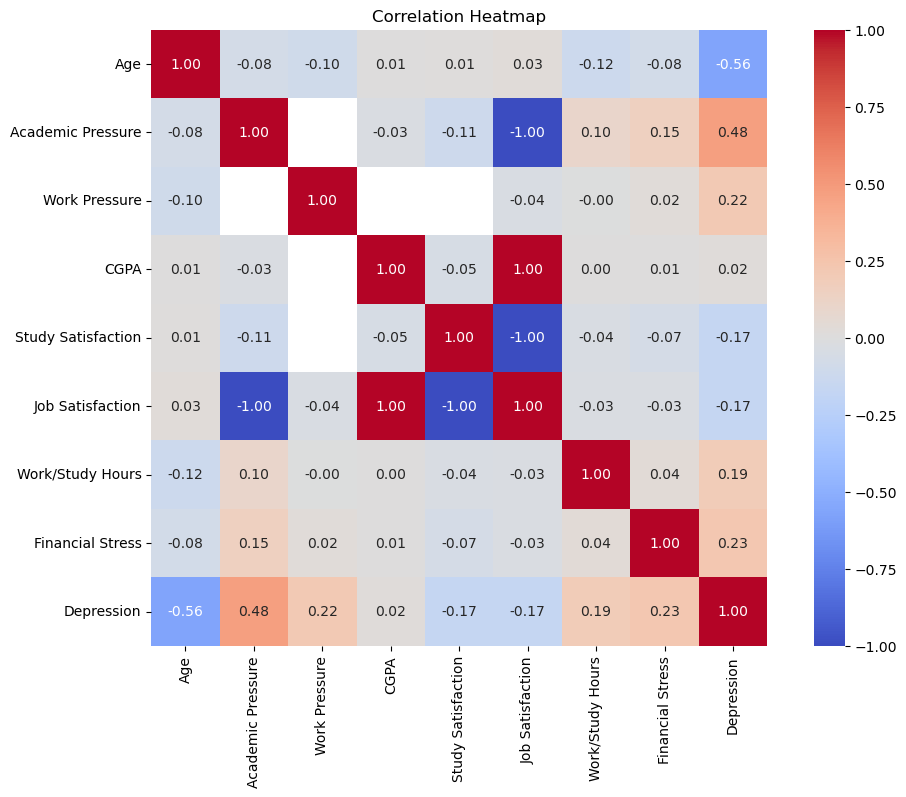

In [65]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [66]:
# plt.figure(figsize=())
# sns.catplot(data=data, x='Age', y='Depression')
# plt.title("Gender Ratio")
# plt.show()

In [67]:
citydep=data.groupby(['City'])['Depression'].sum().sort_values(ascending=False)[:30]
citydep

City
Kalyan           1316
Hyderabad        1237
Ahmedabad        1223
Vasai-Virar      1141
Srinagar         1074
Thane            1039
Ludhiana         1007
Kolkata           988
Patna             967
Surat             936
Lucknow           916
Rajkot            902
Agra              901
Pune              839
Visakhapatnam     824
Bhopal            808
Chennai           786
Jaipur            785
Indore            784
Vadodara          766
Meerut            741
Bangalore         724
Ghaziabad         706
Delhi             689
Varanasi          655
Mumbai            652
Nagpur            610
Kanpur            553
Nashik            499
Faridabad         480
Name: Depression, dtype: int64

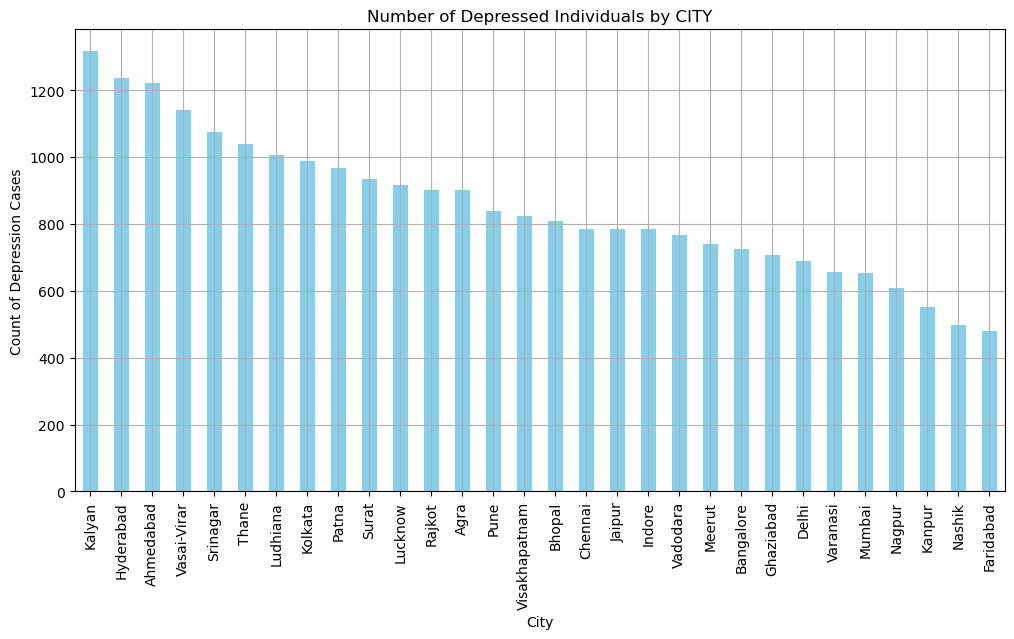

In [68]:
plt.figure(figsize=(12, 6))
citydep.plot(kind='bar', color='skyblue')
plt.title('Number of Depressed Individuals by CITY')
plt.xlabel('City')
plt.ylabel('Count of Depression Cases')

plt.grid()
plt.show()

In [69]:
deg_dep=data.groupby(['Degree'])['Depression'].sum().sort_values(ascending=False)[:30]
deg_dep

Degree
Class 12    7549
B.Ed        1505
B.Arch      1377
B.Com       1263
BCA         1170
B.Tech       947
MSc          849
BSc          782
MCA          768
BHM          743
B.Pharm      698
BBA          676
LLB          655
M.Tech       647
BE           590
M.Ed         551
LLM          530
MBBS         524
MA           506
M.Com        494
BA           472
MBA          459
M.Pharm      445
PhD          443
MD           406
ME           261
MHM          230
20             1
Marsh          1
Class 11       1
Name: Depression, dtype: int64

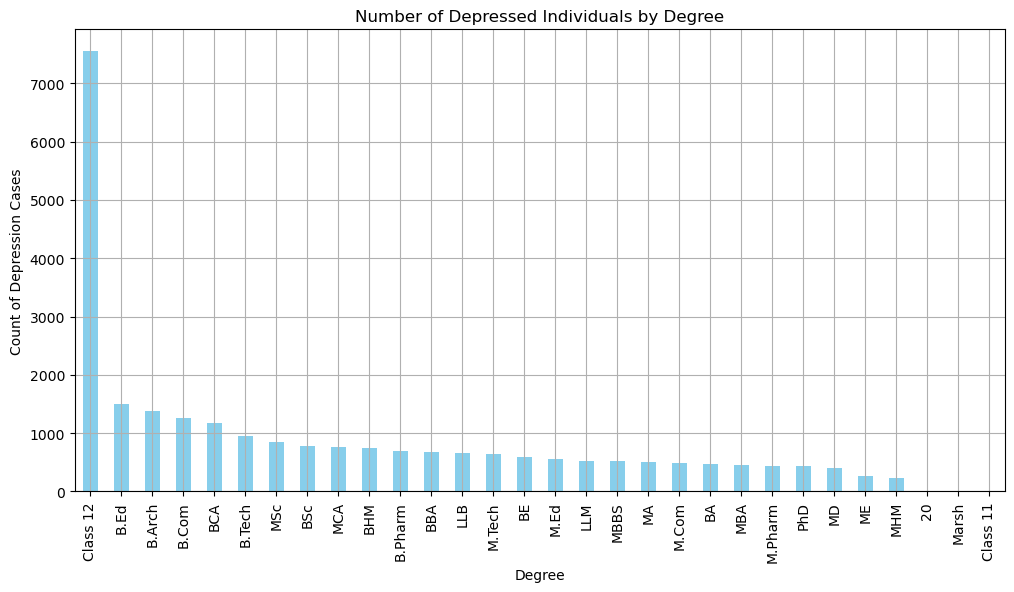

In [70]:
plt.figure(figsize=(12, 6))
deg_dep.plot(kind='bar', color='skyblue')
plt.title('Number of Depressed Individuals by Degree')
plt.xlabel('Degree')
plt.ylabel('Count of Depression Cases')

plt.grid()
plt.show()

# **FEATURE ENGINEERING**


In [71]:
imputer = SimpleImputer(strategy='median')

In [72]:
impute_columns= ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
df_train[impute_columns] = imputer.fit_transform(df_train[impute_columns])
df_test[impute_columns] = imputer.transform(df_test[impute_columns])

In [73]:
df_train.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Academic Pressure                            0
Work Pressure                                0
CGPA                                         0
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [74]:
df_train['Profession'].fillna('other', inplace=True)
df_test['Profession'].fillna('other', inplace=True)

In [75]:
class_counts = df_train['Depression'].value_counts()
print(class_counts)

# Determine the size of the minority class
minority_class_size = class_counts.min()
# Separate majority and minority classes
majority_class = df_train[df_train['Depression'] == 0]  # Adjust according to your dataset
minority_class = df_train[df_train['Depression'] == 1]

# Downsample majority class
majority_class_downsampled = majority_class.sample(minority_class_size, random_state=42)

# Combine the downsampled majority class with the minority class
balanced_df = pd.concat([majority_class_downsampled, minority_class])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


print(balanced_df['Depression'].value_counts())

Depression
0    115133
1     25567
Name: count, dtype: int64
Depression
0    25567
1    25567
Name: count, dtype: int64


In [76]:
# Save 'id' column for submission
test_ids = df_test['id']

# Drop 'id' column in both datasets
balanced_df = balanced_df.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)
balanced_df = balanced_df.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

# Define the target column
target_column = 'Depression'

# Select categorical and numerical columns (initial)
categorical_columns = balanced_df.select_dtypes(include=['object']).columns
numerical_columns = balanced_df.select_dtypes(exclude=['object']).columns.drop(target_column)

# Print out column information
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())

Target Column: Depression

Categorical Columns: ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [77]:
# Feature Engineering
# Create an interaction term between Age and Work Pressure
balanced_df['Age_WorkPressure'] = df_train['Age'] * df_train['Work Pressure']
df_test['Age_WorkPressure'] = df_test['Age'] * df_test['Work Pressure']

# # Target encoding for categorical features
# encoder = TargetEncoder(cols=['City', 'Profession'])
# df_train[['City_encoded', 'Profession_encoded']] = encoder.fit_transform(df_train[['City', 'Profession']], df_train["Depression"])
# df_test[['City_encoded', 'Profession_encoded']] = encoder.transform(df_test[['City', 'Profession']])

In [78]:
def convert_to_float32(x):
    return x.astype(np.float32)

In [79]:
from sklearn.pipeline import Pipeline

In [80]:
# Define features and target
from sklearn.model_selection import train_test_split

x= balanced_df.drop('Depression', axis=1)
y= balanced_df['Depression']
x_test= df_test
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


# Redefine columns for preprocessing after feature engineering
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('convert_to_float32', FunctionTransformer(convert_to_float32))
])

categorical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(dtype=np.int32, handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine the numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)


In [81]:
df_test

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Age_WorkPressure
0,Male,53.0,Visakhapatnam,Working Professional,Judge,3.0,2.0,7.77,3.0,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,106.0
1,Female,58.0,Kolkata,Working Professional,Educational Consultant,3.0,2.0,7.77,3.0,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,116.0
2,Male,53.0,Jaipur,Working Professional,Teacher,3.0,4.0,7.77,3.0,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,212.0
3,Female,23.0,Rajkot,Student,other,5.0,3.0,6.84,1.0,3.0,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,69.0
4,Male,47.0,Kalyan,Working Professional,Teacher,3.0,5.0,7.77,3.0,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,Female,49.0,Jaipur,Working Professional,Pilot,3.0,3.0,7.77,3.0,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,147.0
93796,Male,29.0,Ahmedabad,Working Professional,Pilot,3.0,5.0,7.77,3.0,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,145.0
93797,Male,24.0,Visakhapatnam,Student,other,1.0,3.0,7.51,4.0,3.0,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,72.0
93798,Female,23.0,Kalyan,Working Professional,Marketing Manager,3.0,4.0,7.77,3.0,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,92.0


# **MODEL 1**

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
model1  = Pipeline([ ('Column_Transformer', preprocessor),
    ('classifier1',GradientBoostingClassifier(n_estimators=100))
])

In [84]:
param_grid1 = {
    'classifier1__n_estimators': [100,200],
    'classifier1__max_depth': [3,5,7],
    'classifier1__learning_rate': [0.1, 0.2]
}

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid_search1 = GridSearchCV(model1, param_grid1, cv=3, n_jobs=-1, scoring='accuracy')
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Column_Transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('convert_to_float32',
                                                                                          FunctionTransformer(func=<function convert_to_float32 at 0x000001C783131D00>))]),
                                                                         ['Age',
                                                                          'Academic '
                                                                          'Pressure',
                                                                          'Work '
                                                                          'Pressure',
                                                                          'CGPA',
                                                                          'Study '
                                                                          'Satisfaction',
                                                                          'Job '
                                                                          'Satisfaction',
                                                                          'Work/S...
                                                                          'Student',
                                                                          'Profession',
                                                                          'Sleep '
                                                                          'Duration',
                                                                          'Dietary '
                                                                          'Habits',
                                                                          'Degree',
                                                                          'Have '
                                                                          'you '
                                                                          'ever '
                                                                          'had '
                                                                          'suicidal '
                                                                          'thoughts '
                                                                          '?',
                                                                          'Family '
                                                                          'History '
                                                                          'of '
                                                                          'Mental '
                                                                          'Illness'])])),
                                       ('classifier1',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier1__learning_rate': [0.1, 0.2],
                         'classifier1__max_depth': [3, 5, 7],
                         'classifier1__n_estimators': [100, 200]},
             scoring='accuracy')

In [88]:
grid_search1.best_params_

{'classifier1__learning_rate': 0.2,
 'classifier1__max_depth': 3,
 'classifier1__n_estimators': 100}

In [89]:
grid_search1.best_score_

0.9215558452846588

In [87]:
grid_search1.best_estimator_.fit(X_train, y_train)
y_pred1=grid_search1.best_estimator_.predict(x_test)

In [257]:
import sklearn.metrics as skm

In [258]:
skm.accuracy_score(y_test,y_pred1)

0.9196323816973015

In [259]:
print(skm.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2541
           1       0.92      0.92      0.92      2573

    accuracy                           0.92      5114
   macro avg       0.92      0.92      0.92      5114
weighted avg       0.92      0.92      0.92      5114



In [260]:
print(skm.confusion_matrix(y_test,y_pred1))

[[2323  218]
 [ 193 2380]]


In [261]:
y_pred_prob1= grid_search1.predict_proba(x_test)[:, 1]

In [262]:
print(grid_search1.best_estimator_.named_steps.keys())


dict_keys(['Column_Transformer', 'classifier1'])


In [263]:
best_model = grid_search1.best_estimator_.named_steps['classifier1']


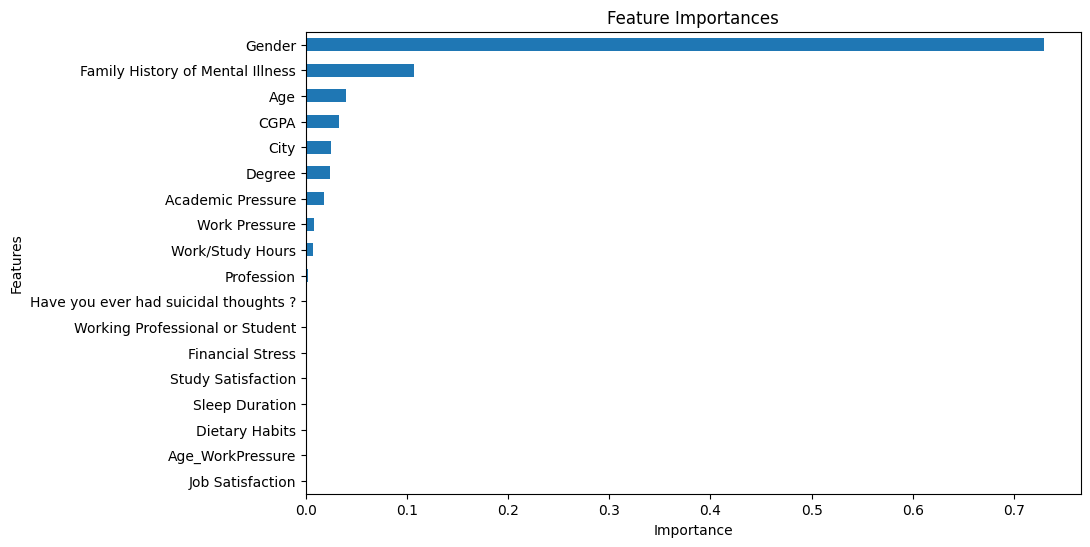

In [264]:
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [265]:
accuracy_1= skm.accuracy_score(y_test, y_pred1)
precision_1 = skm.precision_score(y_test, y_pred1)
recall_1 = skm.recall_score(y_test, y_pred1)
f1_1= skm.f1_score(y_test, y_pred1)

# **MODEL 2**

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
model2  = Pipeline([('Column_Transformer', preprocessor),
    ('classifier2',RandomForestClassifier(class_weight='balanced'))
])
param_grid2 = {
    'classifier2__n_estimators': [100,200],
    'classifier2__max_depth': [3,5,7]
}

In [240]:
grid_search2 = GridSearchCV(model2, param_grid2, cv=3, n_jobs=-1, scoring='accuracy')
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Column_Transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('convert_to_float32',
                                                                                          FunctionTransformer(func=<function convert_to_float32 at 0x7ec920dedbc0>))]),
                                                                         ['Age',
                                                                          'Academic '
                                                                          'Pressure',
                                                                          'Work '
                                                                          'Pressure',
                                                                          'CGPA',
                                                                          'Study '
                                                                          'Satisfaction',
                                                                          'Job '
                                                                          'Satisfaction',
                                                                          'Work/Study...
                                                                          'Professional '
                                                                          'or '
                                                                          'Student',
                                                                          'Profession',
                                                                          'Sleep '
                                                                          'Duration',
                                                                          'Dietary '
                                                                          'Habits',
                                                                          'Degree',
                                                                          'Have '
                                                                          'you '
                                                                          'ever '
                                                                          'had '
                                                                          'suicidal '
                                                                          'thoughts '
                                                                          '?',
                                                                          'Family '
                                                                          'History '
                                                                          'of '
                                                                          'Mental '
                                                                          'Illness'])])),
                                       ('classifier2',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'classifier2__max_depth': [3, 5, 7],
                         'classifier2__n_estimators': [100, 200]},
             scoring='accuracy')

In [241]:
grid_search2.best_params_

{'classifier2__max_depth': 7, 'classifier2__n_estimators': 200}

In [242]:
grid_search2.best_score_

np.float64(0.9109083007388094)

In [243]:
grid_search2.best_estimator_.fit(X_train, y_train)
y_pred2=grid_search2.best_estimator_.predict(x_test)

In [244]:
skm.accuracy_score(y_test,y_pred2)

0.9075087993742668

In [245]:
print(skm.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2541
           1       0.91      0.91      0.91      2573

    accuracy                           0.91      5114
   macro avg       0.91      0.91      0.91      5114
weighted avg       0.91      0.91      0.91      5114



In [246]:
print(skm.confusion_matrix(y_test,y_pred2))

[[2298  243]
 [ 230 2343]]


In [247]:
y_pred_prob2= grid_search2.predict_proba(x_test)[:, 1]

In [248]:
accuracy_2= skm.accuracy_score(y_test, y_pred2)
precision_2 = skm.precision_score(y_test, y_pred2)
recall_2 = skm.recall_score(y_test, y_pred2)
f1_2= skm.f1_score(y_test, y_pred2)

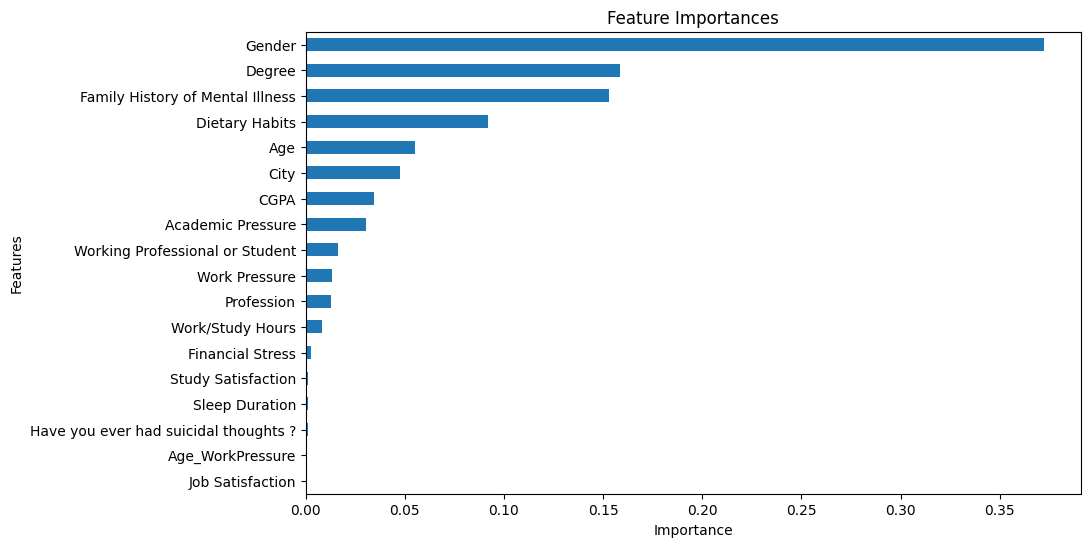

In [266]:
best_model2= grid_search2.best_estimator_.named_steps['classifier2']
importances2= pd.Series(best_model2.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
importances2.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# **MODEL 3**

In [202]:

from sklearn.linear_model import LogisticRegression

In [206]:
model3 = Pipeline([
    ('Column_Transformer', preprocessor),
    ('classifier3', LogisticRegression(max_iter=1000, class_weight='balanced'))
])
param_grid3 = {
   'classifier3__C': [0.1,1,10],
    'classifier3__penalty': ['l1','l2','elasticnet','none']
                                      }
grid_search3 = GridSearchCV(model3, param_grid3, cv=3, n_jobs=-1, scoring='accuracy')
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Column_Transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('convert_to_float32',
                                                                                          FunctionTransformer(func=<function convert_to_float32 at 0x7ec920dedbc0>))]),
                                                                         ['Age',
                                                                          'Academic '
                                                                          'Pressure',
                                                                          'Work '
                                                                          'Pressure',
                                                                          'CGPA',
                                                                          'Study '
                                                                          'Satisfaction',
                                                                          'Job '
                                                                          'Satisfaction',
                                                                          'Work/Study...
                                                                          'Student',
                                                                          'Profession',
                                                                          'Sleep '
                                                                          'Duration',
                                                                          'Dietary '
                                                                          'Habits',
                                                                          'Degree',
                                                                          'Have '
                                                                          'you '
                                                                          'ever '
                                                                          'had '
                                                                          'suicidal '
                                                                          'thoughts '
                                                                          '?',
                                                                          'Family '
                                                                          'History '
                                                                          'of '
                                                                          'Mental '
                                                                          'Illness'])])),
                                       ('classifier3',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier3__C': [0.1, 1, 10],
                         'classifier3__penalty': ['l1', 'l2', 'elasticnet',
                                                  'none']},
             scoring='accuracy')

In [207]:
grid_search3.best_params_

{'classifier3__C': 0.1, 'classifier3__penalty': 'l2'}

In [208]:
grid_search3.best_score_

np.float64(0.9183615819209039)

In [210]:
grid_search3.best_estimator_.fit(X_train, y_train)
y_pred3=grid_search3.best_estimator_.predict(x_test)

In [211]:
skm.accuracy_score(y_test,y_pred3)

0.9174814235432147

In [212]:
print(skm.classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2541
           1       0.91      0.92      0.92      2573

    accuracy                           0.92      5114
   macro avg       0.92      0.92      0.92      5114
weighted avg       0.92      0.92      0.92      5114



In [213]:
print(skm.confusion_matrix(y_test,y_pred3))

[[2314  227]
 [ 195 2378]]


In [214]:
y_pred_prob3= grid_search3.predict_proba(x_test)[:, 1]

In [232]:
accuracy_3= skm.accuracy_score(y_test, y_pred3)
precision_3 = skm.precision_score(y_test, y_pred3)
recall_3= skm.recall_score(y_test, y_pred3)
f1_3= skm.f1_score(y_test, y_pred3)

# **MODEL 4**

In [215]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
model4 = Pipeline([
    ('Column_Transformer', preprocessor),
    ('classifier4',KNeighborsClassifier())
])
param_grid4 = {
   'classifier4__n_neighbors': [4,5,6]
             }
grid_search4 = GridSearchCV(model4, param_grid4, cv=3, n_jobs=-1, scoring='accuracy')
grid_search4.fit(X_train, y_train)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Column_Transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('convert_to_float32',
                                                                                          FunctionTransformer(func=<function convert_to_float32 at 0x7ec920dedbc0>))]),
                                                                         ['Age',
                                                                          'Academic '
                                                                          'Pressure',
                                                                          'Work '
                                                                          'Pressure',
                                                                          'CGPA',
                                                                          'Study '
                                                                          'Satisfaction',
                                                                          'Job '
                                                                          'Satisfaction',
                                                                          'Work/Study...
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['Gender',
                                                                          'City',
                                                                          'Working '
                                                                          'Professional '
                                                                          'or '
                                                                          'Student',
                                                                          'Profession',
                                                                          'Sleep '
                                                                          'Duration',
                                                                          'Dietary '
                                                                          'Habits',
                                                                          'Degree',
                                                                          'Have '
                                                                          'you '
                                                                          'ever '
                                                                          'had '
                                                                          'suicidal '
                                                                          'thoughts '
                                                                          '?',
                                                                          'Family '
                                                                          'History '
                                                                          'of '
                                                                          'Mental '
                                                                          'Illness'])])),
                                       ('classifier4',
                                        KNeighborsClassifier())]),
        

In [218]:
grid_search4.best_params_

{'classifier4__n_neighbors': 5}

In [219]:
grid_search4.best_score_

np.float64(0.8561495002172969)

In [220]:
grid_search4.best_estimator_.fit(X_train, y_train)
y_pred4=grid_search4.best_estimator_.predict(x_test)

In [221]:
skm.accuracy_score(y_test,y_pred4)

0.8584278451310129

In [222]:
print(skm.classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2541
           1       0.85      0.87      0.86      2573

    accuracy                           0.86      5114
   macro avg       0.86      0.86      0.86      5114
weighted avg       0.86      0.86      0.86      5114



In [223]:
print(skm.confusion_matrix(y_test,y_pred4))

[[2163  378]
 [ 346 2227]]


In [224]:
y_pred_prob4= grid_search4.predict_proba(x_test)[:, 1]

In [233]:
accuracy_4= skm.accuracy_score(y_test, y_pred4)
precision_4 = skm.precision_score(y_test, y_pred4)
recall_4 = skm.recall_score(y_test, y_pred4)
f1_4= skm.f1_score(y_test, y_pred4)

# **COMPARISION OF MODELS**

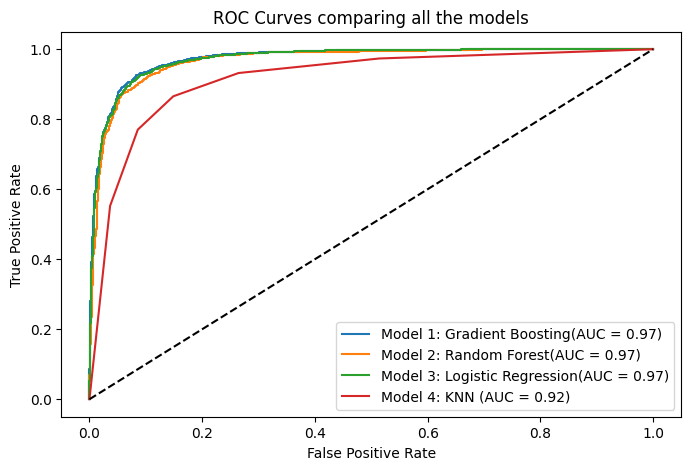

In [268]:
# Calculate ROC and AUC for model 1
fpr_1, tpr_1, _ = skm.roc_curve(y_test, y_pred_prob1)
roc_auc_1 = skm.auc(fpr_1, tpr_1)

# Calculate ROC and AUC for model 2
fpr_2, tpr_2, _2 = skm.roc_curve(y_test, y_pred_prob2)
roc_auc_2 = skm.auc(fpr_2, tpr_2)

# Calculate ROC and AUC for model 3
fpr_3, tpr_3, _3 = skm.roc_curve(y_test, y_pred_prob3)
roc_auc_3 = skm.auc(fpr_3, tpr_3)

# Calculate ROC and AUC for model 4
fpr_4, tpr_4, _4 = skm.roc_curve(y_test, y_pred_prob4)
roc_auc_4 = skm.auc(fpr_4, tpr_4)

# Plot the ROC curves
plt.figure(figsize=(8, 5))
plt.plot(fpr_1, tpr_1, label=f'Model 1: Gradient Boosting(AUC = {roc_auc_1:.2f})')
plt.plot(fpr_2, tpr_2, label=f'Model 2: Random Forest(AUC = {roc_auc_2:.2f})')
plt.plot(fpr_3, tpr_3, label=f'Model 3: Logistic Regression(AUC = {roc_auc_3:.2f})')
plt.plot(fpr_4, tpr_4, label=f'Model 4: KNN (AUC = {roc_auc_4:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves comparing all the models')
plt.legend()
plt.show()

In [271]:
performance_df = pd.DataFrame({
    "Model": ["Model1(Gradient Boosting)", "Model2(Random Forest)", "Model3(logistic regression)", "Model4(KNN)"],
    "Accuracy": [accuracy_1, accuracy_2, accuracy_3, accuracy_4],
    "Precision": [precision_1, precision_2, precision_3, precision_4],
    "Recall": [recall_1, recall_2, recall_3, recall_4],
    "F1-Score": [f1_1, f1_2, f1_3, f1_4]
})

print(performance_df)


                         Model  Accuracy  Precision    Recall  F1-Score
0    Model1(Gradient Boosting)  0.919632   0.916089  0.924990  0.920518
1        Model2(Random Forest)  0.907509   0.906032  0.910610  0.908316
2  Model3(logistic regression)  0.917481   0.912860  0.924213  0.918501
3                  Model4(KNN)  0.858428   0.854894  0.865527  0.860178


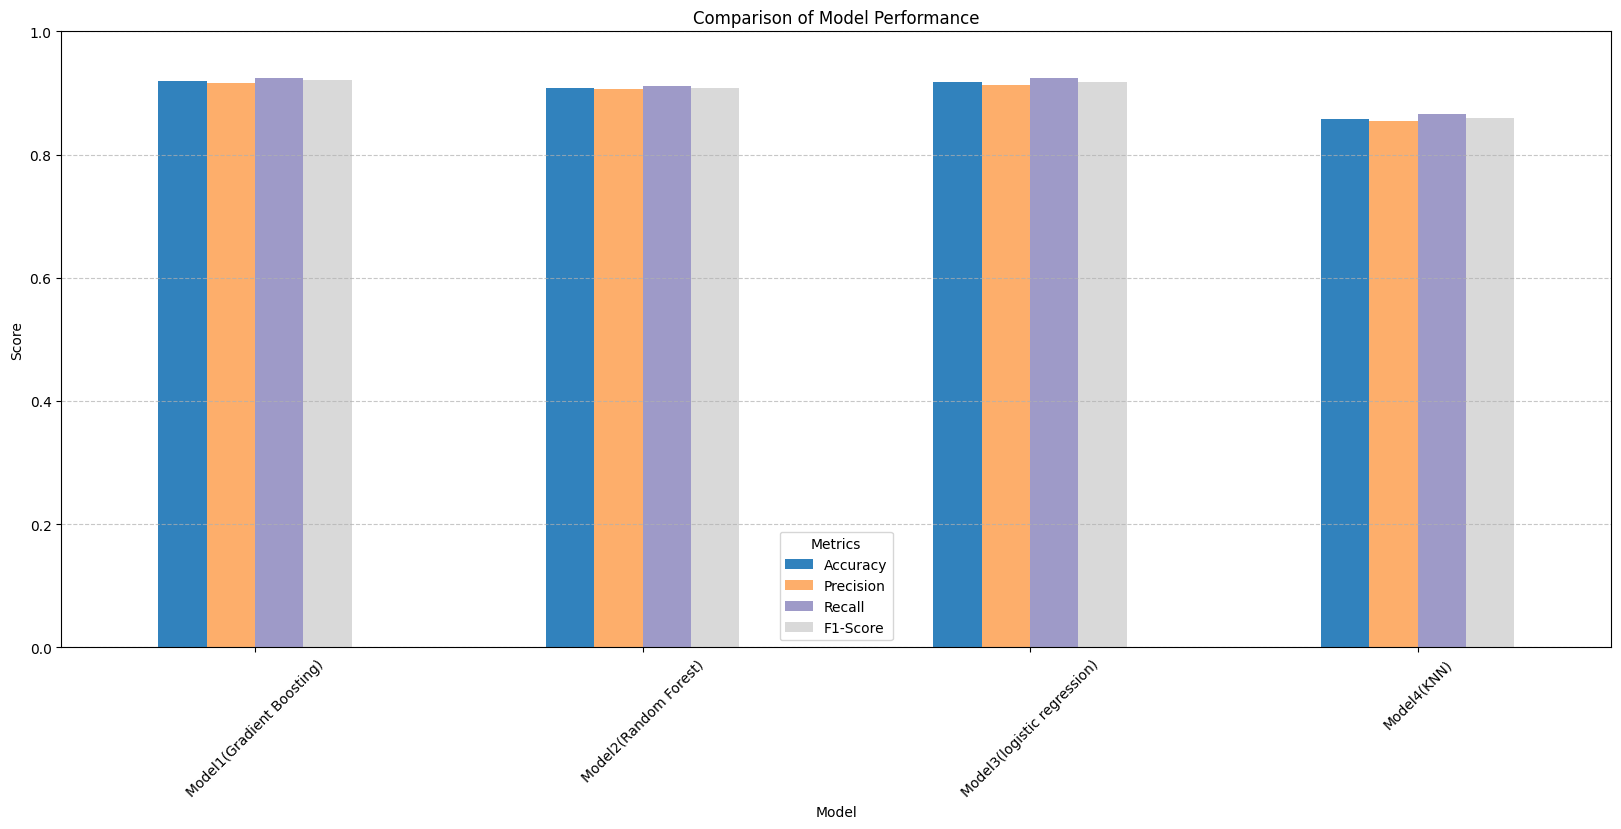

In [272]:

# Create a bar chart for the performance metrics
performance_df.set_index('Model').plot(kind='bar', figsize=(20,8), colormap='tab20c')

plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('age.png')
plt.show()

In [90]:
import joblib


In [91]:

joblib.dump(grid_search1.best_estimator_, "depression_pipeline.pkl")

['depression_pipeline.pkl']

In [275]:
X_train.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Age_WorkPressure'],
      dtype='object')